In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [5]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [4]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Data is clean Lets move into feature engineering section

### Feature Engineering

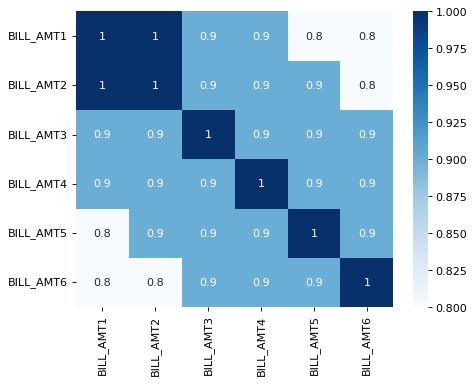

In [6]:
plt.figure(dpi=80)
sns.heatmap(np.round(df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr(),1),annot=True, cmap="Blues")

plt.show()

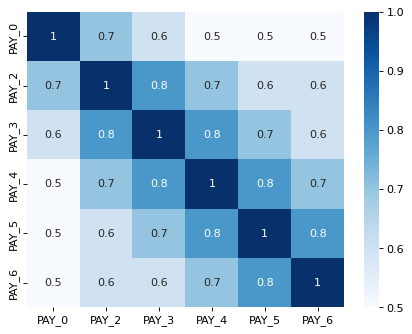

In [7]:
plt.figure(dpi=80)
sns.heatmap(np.round(df[['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(),1),annot=True, cmap="Blues")
plt.show()

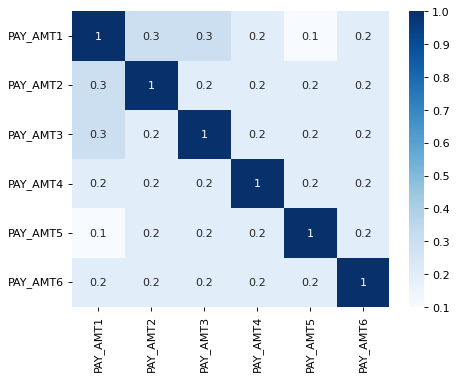

In [8]:
plt.figure(dpi=80)
sns.heatmap(np.round(df[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr(),1),annot=True, cmap="Blues")
plt.show()

In [9]:
df.drop(columns = ['ID', 'PAY_6', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### EDA

In [10]:
y = df['default.payment.next.month']
x = df.iloc[:, :-1]
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


sns.set_theme(style="ticks")
sns.displot(df['LIMIT_BAL'], binwidth=3, height=3)

### Spliting Dataset

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.values, train_size=0.80, random_state=10)

### Model Training

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
model = LogisticRegression(max_iter = 10000)
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [14]:
ypred = model.predict(xtest)
precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=5, pos_label=1, average='weighted', zero_division=1)
auc = roc_auc_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.78
Precision is: 0.83
Recall is: 0.78
Fscore is: 0.77
AUC is: 0.50


#### SVM

In [15]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(xtrain, ytrain)

SVC()

In [16]:
ypred = svc_model.predict(xtest)
precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=5, pos_label=1, average='weighted', zero_division=1)
auc = roc_auc_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.78
Precision is: 0.83
Recall is: 0.78
Fscore is: 0.77
AUC is: 0.50


#### Decision

In [17]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
dc_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [18]:
ypred = dc_model.predict(xtest)
precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=5, pos_label=1, average='weighted', zero_division=1)
auc = roc_auc_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.73
Precision is: 0.74
Recall is: 0.73
Fscore is: 0.73
AUC is: 0.62


#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [20]:
rf_model.fit(xtrain, ytrain)
ypred = rf_model.predict(xtest)
precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
auc = roc_auc_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.82
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.81
AUC is: 0.65


In [21]:
import pickle
pickle.dump(rf_model, open('credit_default.pkl','wb'))